<a href="https://colab.research.google.com/github/prasunna09/Machine-Learning-mini-project/blob/main/ML_approach_in_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ml_mini_project/stock portfolio performance data set (1).xlsx', sheet_name='3rd period')
df.head()

,Unnamed: 0,the weight of the stock-picking concept,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,the normalized investment performance indicator,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,ID,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate
1,1,1,0,0,0,0,0,0.647161,0.688251,0.8,0.8,0.457143,0.65
2,2,0,1,0,0,0,0,0.492034,0.494779,0.488481,0.460754,0.285714,0.65
3,3,0,0,1,0,0,0,0.791489,0.8,0.579796,0.67053,0.457143,0.725
4,4,0,0,0,1,0,0,0.218169,0.263772,0.680969,0.764019,0.2,0.275


In [17]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header


In [18]:
df = df.drop('ID', axis=1)

In [19]:
df.head()

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate
1,1,0,0,0,0,0,0.647161,0.688251,0.8,0.8,0.457143,0.65
2,0,1,0,0,0,0,0.492034,0.494779,0.488481,0.460754,0.285714,0.65
3,0,0,1,0,0,0,0.791489,0.8,0.579796,0.67053,0.457143,0.725
4,0,0,0,1,0,0,0.218169,0.263772,0.680969,0.764019,0.2,0.275
5,0,0,0,0,1,0,0.273698,0.262572,0.406379,0.333465,0.371429,0.575


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 1 to 63
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0    Large B/P                               63 non-null     object
 1    Large ROE                               63 non-null     object
 2    Large S/P                               63 non-null     object
 3    Large Return Rate in the last quarter   63 non-null     object
 4    Large Market Value                      63 non-null     object
 5    Small systematic Risk                   63 non-null     object
 6   Annual Return                            63 non-null     object
 7   Excess Return                            63 non-null     object
 8   Systematic Risk                          63 non-null     object
 9   Total Risk                               63 non-null     object
 10  Abs. Win Rate                            63 non-null     object


In [21]:
pattern = df.shape[0]
features = df.shape[1]-6
print('number of features {}'.format(features))
print('number of patterns {}'.format(pattern))

number of features 6
number of patterns 63


In [22]:
for col in df.columns:
    print(col)

 Large B/P 
 Large ROE 
 Large S/P 
 Large Return Rate in the last quarter 
 Large Market Value 
 Small systematic Risk
Annual Return
Excess Return
Systematic Risk
Total Risk
Abs. Win Rate
Rel. Win Rate


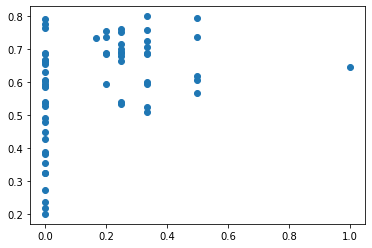

In [23]:
plt.scatter(df[' Large B/P '], df['Annual Return'])

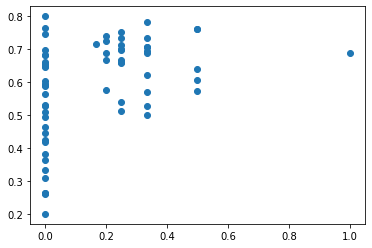

In [24]:
plt.scatter(df[' Large B/P '], df['Excess Return'])

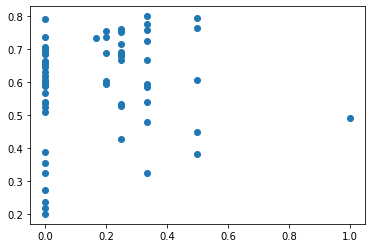

In [25]:
plt.scatter(df[' Large ROE '], df['Annual Return'])

In [ ]:
X = df.iloc[:, 0:6]
Y = df.iloc[:, 6:]

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model1 = LinearRegression().fit(X,Y.iloc[:,0])  #Annual Return
model2 = LinearRegression().fit(X,Y.iloc[:,1])  #Excess Return
model3 = LinearRegression().fit(X,Y.iloc[:,2])  #Systematic Risk
model4 = LinearRegression().fit(X,Y.iloc[:,3])  #Total Risk
model5 = LinearRegression().fit(X,Y.iloc[:,4])  #Abs. Win Rate
model6 = LinearRegression().fit(X,Y.iloc[:,5])  #Rel. Win Rate

In [ ]:
print(model1.score(X,Y.iloc[:,0]))
print(model2.score(X,Y.iloc[:,1]))
print(model3.score(X,Y.iloc[:,2]))
print(model4.score(X,Y.iloc[:,3]))
print(model5.score(X,Y.iloc[:,4]))
print(model6.score(X,Y.iloc[:,5]))

0.7357532024358292
0.7818623825607572
0.3918334102793113
0.5739961988350175
0.32999680517437235
0.5683377362773634


--------------------X-------------------------X-------------------------

# Annual return

[0.73481932 0.45134164 0.60194108 0.52091796 0.56753672 0.66392599
 0.64173952 0.51850924 0.58655782 0.50242916 0.46332753 0.56683308
 0.57420302 0.63414304 0.33444292 0.56433585 0.54978886 0.71849722
 0.6482152 ]
0.7275748824861061
0.6882607901977171
mse : 0.0054040030485757885


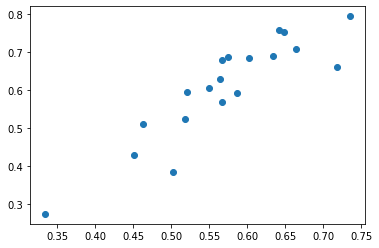

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=3)
m1 = LinearRegression().fit(x_train,y_train.iloc[:,0])
y_p1 = m1.predict(x_test)
print(y_p1)
print(m1.score(x_train, y_train.iloc[:,0]))
print(m1.score(x_test, y_test.iloc[:, 0]))
print("mse :",mean_squared_error(y_test.iloc[:, 0], y_p1))
plt.scatter(y_p1, y_test.iloc[:, 0])

#Excess Return

[0.72279087 0.44652085 0.60346469 0.52047838 0.57421458 0.67617536
 0.64503939 0.54217499 0.56999056 0.46740341 0.46712616 0.56092103
 0.58128551 0.6502235  0.30553356 0.58113614 0.56833983 0.73210718
 0.64306593]
0.7686687334922737
0.7795659369817366
mse : 0.003856585964903499


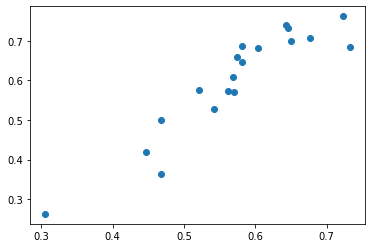

In [ ]:
m2 = LinearRegression().fit(x_train,y_train.iloc[:,1])
y_p2 = m2.predict(x_test)
print(y_p2)
print(m2.score(x_train, y_train.iloc[:,1]))
print(m2.score(x_test, y_test.iloc[:, 1]))
print("mse :",mean_squared_error(y_test.iloc[:, 1], y_p2))
plt.scatter(y_p2, y_test.iloc[:, 1])

# Systamatic Risk

[0.37744453 0.3687317  0.43100425 0.41745347 0.46769359 0.51533671
 0.47170465 0.57806166 0.32603267 0.17952075 0.43238968 0.41441675
 0.48206039 0.54845225 0.21649297 0.52919145 0.53713974 0.55976476
 0.41818231]
0.45050345086521326
-0.6137044557234455
mse : 0.017643284929782642


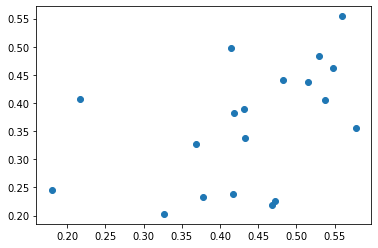

In [ ]:
m3 = LinearRegression().fit(x_train,y_train.iloc[:,2])
y_p3 = m3.predict(x_test)
print(y_p3)
print(m3.score(x_train, y_train.iloc[:,2]))
print(m3.score(x_test, y_test.iloc[:, 2]))
print("mse :",mean_squared_error(y_test.iloc[:, 2], y_p3))
plt.scatter(y_p3, y_test.iloc[:, 2])

# Total Risk

[0.41313992 0.38695525 0.50495854 0.44318149 0.52308454 0.60800296
 0.51206629 0.64532966 0.3175592  0.14088133 0.45082257 0.39582789
 0.53065931 0.63243182 0.1235693  0.62118582 0.61323507 0.65162856
 0.45062125]
0.5892587932110146
0.16034375224911734
mse : 0.013049473167342413


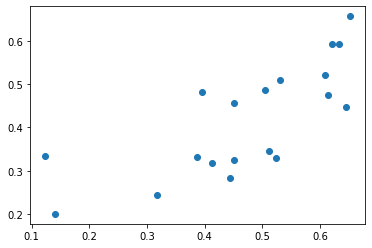

In [ ]:
m4 = LinearRegression().fit(x_train,y_train.iloc[:,3])
y_p4 = m4.predict(x_test)
print(y_p4)
print(m4.score(x_train, y_train.iloc[:, 3]))
print(m4.score(x_test, y_test.iloc[:, 3]))
print("mse :",mean_squared_error(y_test.iloc[:, 3], y_p4))
plt.scatter(y_p4, y_test.iloc[:, 3])

# Abs. Win Rate

[0.66151652 0.45425926 0.49851687 0.49630904 0.48773038 0.54756523
 0.52788061 0.41479755 0.60169715 0.59457428 0.48861409 0.59756592
 0.50613489 0.50001269 0.53062367 0.42916515 0.49172214 0.50830324
 0.57405264]
0.34511707906330324
-0.0505502609396975
mse : 0.015907025942115932


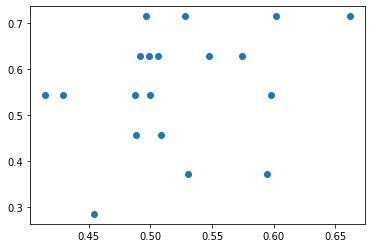

In [ ]:
m5 = LinearRegression().fit(x_train,y_train.iloc[:,4])
y_p5 = m5.predict(x_test)
print(y_p5)
print(m5.score(x_train, y_train.iloc[:, 4]))
print(m5.score(x_test, y_test.iloc[:, 4]))
print("mse :",mean_squared_error(y_test.iloc[:, 4], y_p5))
plt.scatter(y_p5, y_test.iloc[:, 4])

# Rel. Win Rate

[0.78542454 0.58503051 0.58949811 0.61141962 0.57142709 0.61529492
 0.62173954 0.46395963 0.76712399 0.81263139 0.60934408 0.7441829
 0.59849704 0.55527386 0.77138975 0.48803022 0.54851776 0.56202996
 0.69325975]
0.5748062811216503
0.47209167525274687
mse : 0.006679283305493291


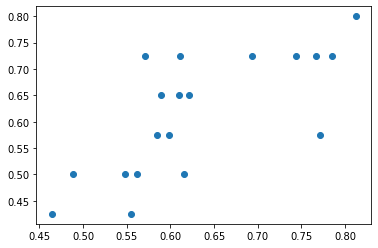

In [ ]:
m6 = LinearRegression().fit(x_train,y_train.iloc[:,5])
y_p6 = m6.predict(x_test)
print(y_p6)
print(m6.score(x_train, y_train.iloc[:, 5]))
print(m6.score(x_test, y_test.iloc[:, 5]))
print("mse :",mean_squared_error(y_test.iloc[:, 5], y_p6))
plt.scatter(y_p6, y_test.iloc[:, 5])

--------------X------------X---------------

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=3)

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print("predicted values are : ")
print(y_pred)

print("\n test set values are :")
print(np.asarray(y_test)[:])

predicted values are : 
[[0.73481932 0.72279087 0.37744453 0.41313992 0.66151652 0.78542454]
 [0.45134164 0.44652085 0.3687317  0.38695525 0.45425926 0.58503051]
 [0.60194108 0.60346469 0.43100425 0.50495854 0.49851687 0.58949811]
 [0.52091796 0.52047838 0.41745347 0.44318149 0.49630904 0.61141962]
 [0.56753672 0.57421458 0.46769359 0.52308454 0.48773038 0.57142709]
 [0.66392599 0.67617536 0.51533671 0.60800296 0.54756523 0.61529492]
 [0.64173952 0.64503939 0.47170465 0.51206629 0.52788061 0.62173954]
 [0.51850924 0.54217499 0.57806166 0.64532966 0.41479755 0.46395963]
 [0.58655782 0.56999056 0.32603267 0.3175592  0.60169715 0.76712399]
 [0.50242916 0.46740341 0.17952075 0.14088133 0.59457428 0.81263139]
 [0.46332753 0.46712616 0.43238968 0.45082257 0.48861409 0.60934408]
 [0.56683308 0.56092103 0.41441675 0.39582789 0.59756592 0.7441829 ]
 [0.57420302 0.58128551 0.48206039 0.53065931 0.50613489 0.59849704]
 [0.63414304 0.6502235  0.54845225 0.63243182 0.50001269 0.55527386]
 [0.334442

In [ ]:
print("Training Accuracy:",lr.score(x_train,y_train))

Training Accuracy: 0.5737184978098757


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [ ]:
print("validation Accuracy:",lr.score(x_test,y_test))

validation Accuracy: 0.2980899823467963


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE:- ",mean_squared_error(y_test, y_pred))

MSE:-  0.010423276059702313


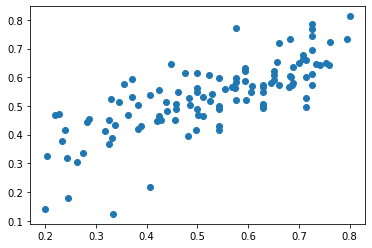

In [ ]:
plt.scatter(y_test, y_pred)

------------------X---------------X-----------------

# Using SGD(Hyperparameter tuning)

In [2]:
df1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ml_mini_project/stock portfolio performance data set (1).xlsx', sheet_name='2nd period')
df1.head()

,Unnamed: 0,the weight of the stock-picking concept,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,the normalized investment performance indicator,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,ID,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate
1,1,1,0,0,0,0,0,0.227755,0.50754,0.244336,0.316609,0.371429,0.4
2,2,0,1,0,0,0,0,0.589132,0.481622,0.587008,0.367016,0.542857,0.6
3,3,0,0,1,0,0,0,0.310197,0.325059,0.491529,0.42591,0.285714,0.4
4,4,0,0,0,1,0,0,0.732604,0.490854,0.8,0.8,0.542857,0.6


In [3]:
new_header = df1.iloc[0] #grab the first row for the header
df1 = df1[1:] #take the data less the header row
df1.columns = new_header #set the header row as the df header

In [4]:
df1 = df1.drop('ID', axis=1)

In [5]:
df1.head()

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate
1,1,0,0,0,0,0,0.227755,0.50754,0.244336,0.316609,0.371429,0.4
2,0,1,0,0,0,0,0.589132,0.481622,0.587008,0.367016,0.542857,0.6
3,0,0,1,0,0,0,0.310197,0.325059,0.491529,0.42591,0.285714,0.4
4,0,0,0,1,0,0,0.732604,0.490854,0.8,0.8,0.542857,0.6
5,0,0,0,0,1,0,0.632961,0.634952,0.46601,0.2,0.8,0.3


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# ANNUAL RETURN

In [7]:
x = df1.iloc[:, 0:6]
y1 = df1.iloc[:, 6]

x_train,x_r,y_train,y_r = train_test_split(x,y1,train_size=0.6,random_state=3)
x_valid, x_test, y_valid, y_test = train_test_split(x_r,y_r,test_size=0.5,random_state=3)
#lr = 0.1 #learning rate #mse: 0.013758178600912298
#rho = 0.5 #stopping criteria
#itr = 500 #epoch
lr = 0.01 #mse :  0.004625348510260119
rho = 0.00001
itr = 500
print("results of linear reg: ")
SGDReg_1 = linear_model.SGDRegressor(max_iter = itr, learning_rate = 'constant', eta0 = lr, tol = rho)
SGDReg_1.fit(x_train, y_train)
mse1 = mean_squared_error(y_valid, SGDReg_1.predict(x_valid))
print("mse : ", mse1)


results of linear reg: 
mse :  0.004597122054510231


In [8]:
lr = 0.01
rho = 0.00001
itr = 500
print("results of linear reg for test set: ")
SGDReg_1 = linear_model.SGDRegressor(max_iter = itr, learning_rate = 'constant', eta0 = lr, tol = rho)
SGDReg_1.fit(x_train, y_train)
mse1 = mean_squared_error(y_test, SGDReg_1.predict(x_test))
print("test mse : ", mse1)

results of linear reg for test set: 
test mse :  0.007935330316995358


In [9]:
print("mse : ", mse1)
print("Actual Values : ", y_test)
print("Predicted values : ", SGDReg_1.predict(x_test))


mse :  0.007935330316995358
Actual Values :  59    0.384899
19    0.274221
61    0.378291
17         0.2
37    0.481079
10    0.368398
49     0.33381
50    0.545977
55    0.795741
34     0.51703
5     0.632961
48    0.567642
47    0.398972
Name: Annual Return, dtype: object
Predicted values :  [0.42143594 0.3124017  0.42000287 0.29020661 0.4429807  0.47489263
 0.39364716 0.5101233  0.56900143 0.44536675 0.5254257  0.49902576
 0.3954385 ]


# Excess Return

In [12]:
x = df1.iloc[:, 0:6]
y2 = df1.iloc[:, 7]

x_train,x_r,y_train,y_r = train_test_split(x,y2,train_size=0.6,random_state=3)
x_valid, x_test, y_valid, y_test = train_test_split(x_r,y_r,test_size=0.5,random_state=3)
lr = 0.1 #learning rate #mse :  0.006619851092433992
rho = 0.5 #stopping criteria
itr = 500 #epoch
#lr = 0.001
#rho = 0.0001
#itr = 500
print("results of linear reg: ")
SGDReg_1 = linear_model.SGDRegressor(max_iter = itr, learning_rate = 'constant', eta0 = lr, tol = rho)
SGDReg_1.fit(x_train, y_train)
mse2 = mean_squared_error(y_valid, SGDReg_1.predict(x_valid))
print("mse : ", mse2)


results of linear reg: 
mse :  0.00712187188638916


In [13]:
lr = 0.1 #learning rate
rho = 0.5 #stopping criteria
itr = 500 #epoch
print("results of linear reg for test set: ")
SGDReg_1 = linear_model.SGDRegressor(max_iter = itr, learning_rate = 'constant', eta0 = lr, tol = rho)
SGDReg_1.fit(x_train, y_train)
mse2 = mean_squared_error(y_test, SGDReg_1.predict(x_test))
print("mse : ", mse2)

results of linear reg for test set: 
mse :  0.010434532064699503


In [14]:
print("mse : ", mse2)
print("Actual Values : ", y_test)
print("Predicted values : ", SGDReg_1.predict(x_test))

mse :  0.010434532064699503
Actual Values :  59    0.515604
19    0.318641
61    0.558443
17    0.465028
37    0.511664
10    0.699995
49    0.495608
50    0.578402
55    0.703839
34     0.53918
5     0.634952
48         0.8
47    0.563954
Name: Excess Return, dtype: object
Predicted values :  [0.51345901 0.3918763  0.50363109 0.4730472  0.45737381 0.58015017
 0.48601324 0.50241707 0.54355007 0.47373729 0.57410252 0.54300252
 0.49829813]


# Systematic Risk

In [ ]:
x = df1.iloc[:, 0:6]
y3 = df1.iloc[:, 8]

x_train,x_r,y_train,y_r = train_test_split(x,y3,train_size=0.6,random_state=3)
x_valid, x_test, y_valid, y_test = train_test_split(x_r,y_r,test_size=0.5,random_state=3)
lr = 0.1 #learning rate  #mse :  0.013758178600912298
rho = 0.5 #stopping criteria
itr = 500 #epoch
#lr = 0.0001
#rho = 0.001
#itr = 2000
print("results of linear reg: ")
SGDReg_1 = linear_model.SGDRegressor(max_iter = itr, learning_rate = 'constant', eta0 = lr, tol = rho)
SGDReg_1.fit(x_train, y_train)
mse3 = mean_squared_error(y_valid, SGDReg_1.predict(x_valid))
print("mse : ", mse3)

results of linear reg: 
mse :  0.013758178600912298


In [ ]:
lr = 0.1 
rho = 0.5 
max_itr = 500 

print("results of linear reg for test set: ")
SGDReg_1 = linear_model.SGDRegressor(max_iter = itr, learning_rate = 'constant', eta0 = lr, tol = rho)
SGDReg_1.fit(x_train, y_train)
mse3 = mean_squared_error(y_test, SGDReg_1.predict(x_test))
print("mse : ", mse3)

results of linear reg for test set: 
mse :  0.008229190784099592


In [ ]:
print("mse : ", mse3)
print("Actual Values : ", y_test)
print("Predicted values : ", SGDReg_1.predict(x_test))

mse :  0.008229190784099592
Actual Values :  59    0.383468
19    0.462653
61    0.336303
17     0.25177
37    0.483168
10         0.2
49     0.36207
50     0.47854
55    0.582114
34    0.485741
5      0.46601
48    0.295212
47    0.362573
Name: Systematic Risk, dtype: object
Predicted values :  [0.40897519 0.44805195 0.42734891 0.3425177  0.50308667 0.41523472
 0.43164333 0.50782185 0.50336169 0.47249443 0.41017121 0.45505473
 0.40867618]


# Total Risk

In [ ]:
x = df1.iloc[:, 0:6]
y4 = df1.iloc[:, 9]

x_train,x_r,y_train,y_r = train_test_split(x,y4,train_size=0.6,random_state=3)
x_valid, x_test, y_valid, y_test = train_test_split(x_r,y_r,test_size=0.5,random_state=3)
lr = 0.1 #learning rate  #mse :  0.007897522852629752
rho = 0.5 #stopping criteria
itr = 500 #epoch
#lr = 0.0001 #mse :  0.11210510398936405
#rho = 0.001
#itr = 2000
print("results of linear reg: ")
SGDReg_1 = linear_model.SGDRegressor(max_iter = itr,learning_rate = 'constant',eta0 = lr,tol = rho)
SGDReg_1.fit(x_train, y_train)
mse4 = mean_squared_error(y_valid, SGDReg_1.predict(x_valid))
print("mse : ", mse4)

results of linear reg: 
mse :  0.007897522852629752


In [ ]:
lr = 0.1 
rho = 0.5 
itr = 500 
print("results of linear reg for test set: ")
SGDReg_1 = linear_model.SGDRegressor(max_iter = itr,learning_rate = 'constant',eta0 = lr,tol = rho)
SGDReg_1.fit(x_train, y_train)
mse4 = mean_squared_error(y_test, SGDReg_1.predict(x_test))
print("mse : ", mse4)

results of linear reg for test set: 
mse :  0.0035295332332010458


In [ ]:
print("mse : ", mse4)
print("Actual Values : ", y_test)
print("Predicted values : ", SGDReg_1.predict(x_test))

mse :  0.0035295332332010458
Actual Values :  59    0.353574
19    0.411816
61    0.325086
17    0.301101
37    0.416726
10    0.259765
49    0.386663
50    0.393196
55    0.419277
34    0.394577
5          0.2
48    0.304955
47    0.388801
Name: Total Risk, dtype: object
Predicted values :  [0.29850724 0.34143501 0.33859867 0.31565949 0.40654576 0.40488342
 0.37315922 0.38916178 0.35820071 0.33979354 0.20035647 0.37627402
 0.32304493]


# Abs. Win Rate

In [ ]:
x = df1.iloc[:, 0:6]
y5 = df1.iloc[:, 10]

x_train,x_r,y_train,y_r = train_test_split(x,y5,train_size=0.6,random_state=3)
x_valid, x_test, y_valid, y_test = train_test_split(x_r,y_r,test_size=0.5,random_state=3)
lr = 0.1 #learning rate  #mse :  0.006229052646036139
rho = 0.5 #stopping criteria
itr = 500 #epoch
#lr = 0.0001 #mse :  0.24755807284476367
#rho = 0.001
#itr = 2000
print("results of linear reg: ")
SGDReg_1 = linear_model.SGDRegressor(max_iter = itr,learning_rate = 'constant',eta0 = lr,tol = rho)
SGDReg_1.fit(x_train, y_train)
mse5 = mean_squared_error(y_valid, SGDReg_1.predict(x_valid))
print("mse : ", mse5)

results of linear reg: 
mse :  0.006229052646036139


In [ ]:
lr = 0.1
rho = 0.5 
itr = 500 
print("results of linear reg: ")
SGDReg_1 = linear_model.SGDRegressor(max_iter = itr,learning_rate = 'constant',eta0 = lr,tol = rho)
SGDReg_1.fit(x_train, y_train)
mse5 = mean_squared_error(y_test, SGDReg_1.predict(x_test))
print("mse : ", mse5)

results of linear reg: 
mse :  0.011350579485838595


In [ ]:
print("mse : ", mse5)
print("Actual Values : ", y_test)
print("Predicted values : ", SGDReg_1.predict(x_test))

mse :  0.011350579485838595
Actual Values :  59    0.542857
19    0.285714
61    0.285714
17    0.285714
37    0.371429
10    0.457143
49         0.2
50    0.457143
55    0.457143
34    0.371429
5          0.8
48    0.457143
47    0.371429
Name: Abs. Win Rate, dtype: object
Predicted values :  [0.41035833 0.31691226 0.40575215 0.35771709 0.37227728 0.43380086
 0.37535656 0.4057326  0.46182757 0.37994658 0.52733449 0.42613501
 0.38111429]


# Rel. Win Rate

In [ ]:
x = df1.iloc[:, 0:6]
y6 = df1.iloc[:, 11]

x_train,x_r,y_train,y_r = train_test_split(x,y6,train_size=0.6,random_state=3)
x_valid, x_test, y_valid, y_test = train_test_split(x_r,y_r,test_size=0.5,random_state=3)
lr = 0.1 #learning rate  #mse :  0.006815174199087365
rho = 0.5 #stopping criteria
itr = 500 #epoch
#lr = 0.0001 #mse :  0.22999264321094445 
#lr = 0.1 #mse :  0.006966749572783009
#rho = 0.001
#itr = 2000
print("results of linear reg: ")
SGDReg_1 = linear_model.SGDRegressor(max_iter = itr,learning_rate = 'constant',eta0 = lr,tol = rho)
SGDReg_1.fit(x_train, y_train)
mse6 = mean_squared_error(y_valid, SGDReg_1.predict(x_valid))
print("mse : ", mse6)

results of linear reg: 
mse :  0.006815174199087365


In [ ]:
lr = 0.1 
rho = 0.5 
itr = 500 

print("results of linear reg for test set: ")
SGDReg_1 = linear_model.SGDRegressor(max_iter = itr,learning_rate = 'constant',eta0 = lr,tol = rho)
SGDReg_1.fit(x_train, y_train)
mse6 = mean_squared_error(y_test, SGDReg_1.predict(x_test))
print("mse : ", mse6)

results of linear reg for test set: 
mse :  0.010948480720243382


In [ ]:
print("mse : ", mse6)
print("Actual Values : ", y_test)
print("Predicted values : ", SGDReg_1.predict(x_test))

mse :  0.010948480720243382
Actual Values :  59    0.6
19    0.4
61    0.4
17    0.4
37    0.5
10    0.6
49    0.3
50    0.5
55    0.6
34    0.6
5     0.3
48    0.7
47    0.5
Name: Rel. Win Rate, dtype: object
Predicted values :  [0.48250558 0.47682945 0.44650149 0.46571904 0.4769558  0.42062722
 0.44872833 0.52212012 0.53499998 0.53690261 0.4375941  0.51656492
 0.49373345]
